In [ ]:
# !pip install numpy
# !pip install pandas
# !pip install seaborn
# !pip install matplotlib
# !pip install sklearn
# !pip install statsmodels

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load data (4 features [tv,radio,newspaper,sales])
df = pd.read_csv("/Users/williamyau/DS Projects/MMM_Advertising.csv")

<AxesSubplot:>

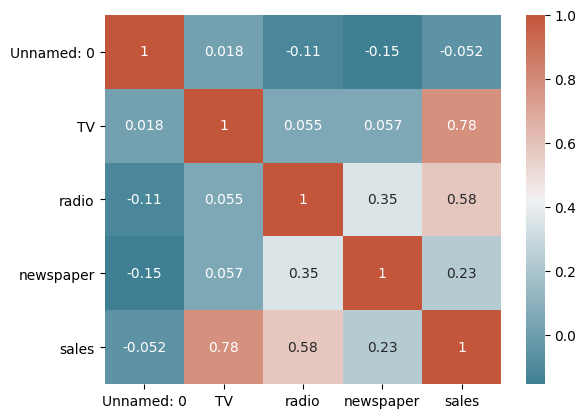

In [3]:
#correlation matrices to understand relationships between each pair
corr = df.corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, annot = True, cmap = sns.diverging_palette(220, 20, as_cmap=True))

In [ ]:
#visualise data plots of matrices
sns.pairplot(df)


<AxesSubplot:>

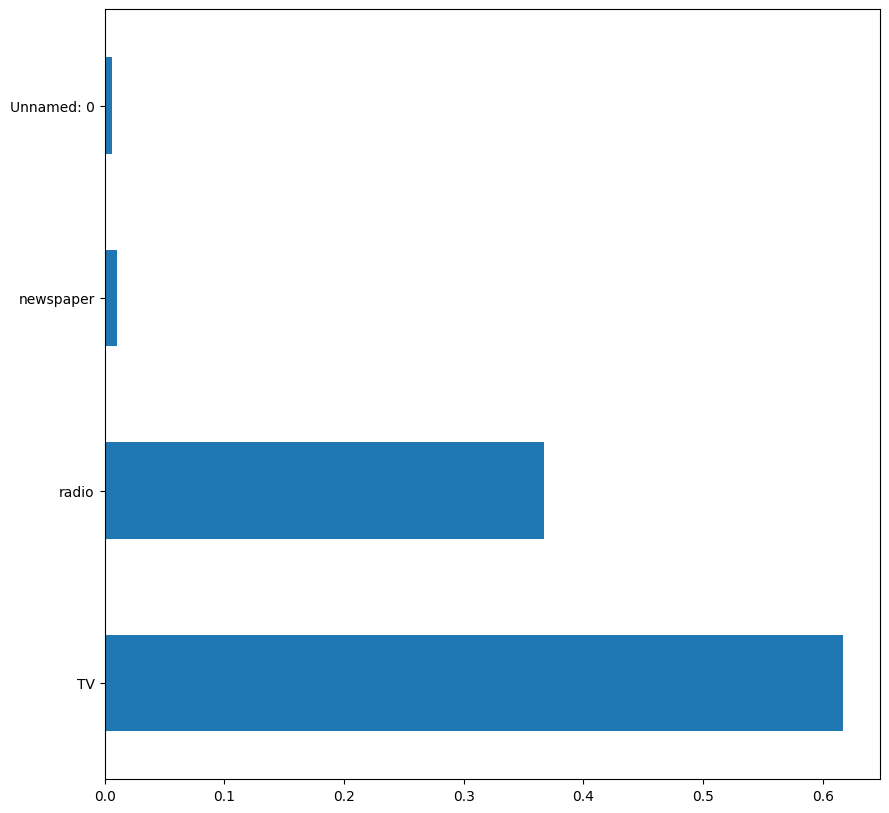

In [4]:
# Map Feature Importance
# Setting X and y variables
X = df.loc[:, df.columns != 'sales']
y = df['sales']# Building Random Forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)
pred = model.predict(X_test)# Visualizing Feature Importance
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

In [5]:
# Build MMM
import statsmodels.formula.api as sm
model = sm.ols(formula="sales~TV+radio+newspaper", data=df).fit()
print(model.summary())

# Adj R-Squared of 0.896 means 90% of data is explained within MMM
# Therefore, 10% is connected to missing variables or noisy data

# F-statistic is close to 0, indicating there is 1>= good predictors
# P>|t| is 0 for most channels, but newspaper p = 0.86: newspaper has weak impact



                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           1.58e-96
Time:                        13:49:16   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

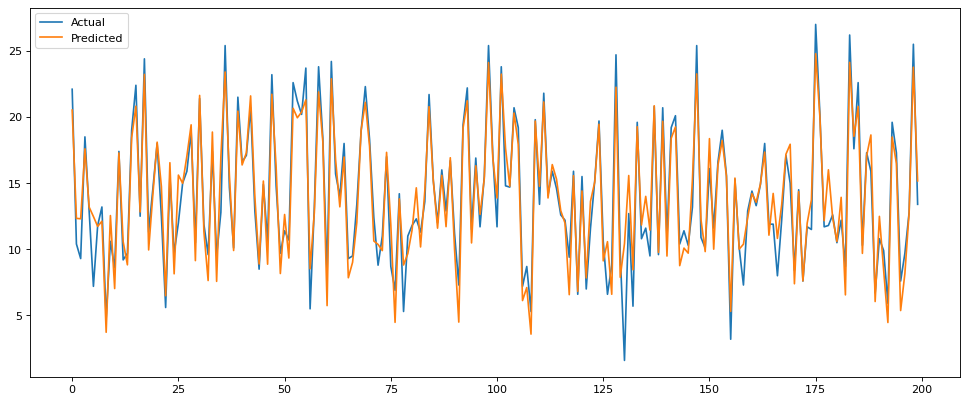

In [6]:
# Plot MMM
from matplotlib.pyplot import figure

y_pred = model.predict()
labels = df['sales']
df_temp = pd.DataFrame({'Actual': labels, 'Predicted':y_pred})
df_temp.head()

figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
y1 = df_temp['Actual']
y2 = df_temp['Predicted']
plt.plot(y1, label = 'Actual')
plt.plot(y2, label = 'Predicted')
plt.legend()
plt.show()
